## Import required packages and load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

In [2]:
df = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported_-_Historical.csv', sep = ',')

# print first few rows of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65119 entries, 0 to 65118
Data columns (total 23 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   SERVICE REQUEST TYPE                                                   65119 non-null  object 
 1   SERVICE REQUEST NUMBER                                                 65119 non-null  object 
 2   DATE SERVICE REQUEST WAS RECEIVED                                      65119 non-null  object 
 3   LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  56345 non-null  object 
 4   IS THE BUILDING DANGEROUS OR HAZARDOUS?                                0 non-null      float64
 5   IS BUILDING OPEN OR BOARDED?                                           56863 non-null  object 
 6   IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                     34362 non-null 

In [21]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SERVICE REQUEST TYPE,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building,Vacant/Abandoned Building
SERVICE REQUEST NUMBER,17-06828959,17-06827096,17-06818719,17-06824436,17-06826684,17-06832236,17-05167309,17-05172696,17-05174699,17-05176718
DATE SERVICE REQUEST WAS RECEIVED,2017-10-11 00:00:00,2017-10-11 00:00:00,2017-10-11 00:00:00,2017-10-11 00:00:00,2017-10-11 00:00:00,2017-10-11 00:00:00,2017-08-04 00:00:00,2017-08-04 00:00:00,2017-08-04 00:00:00,2017-08-04 00:00:00
"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",Front,Front,NaN,Rear,Front,Front,Front,Rear,Front,Front
IS THE BUILDING DANGEROUS OR HAZARDOUS?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IS BUILDING OPEN OR BOARDED?,Open,Open,NaN,Open,Open,Open,Open,Open,Open,Open
"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",NaN,FRONT DOOR,NaN,SIDE DOOR,FRONT DOOR,"FRONT/REAR DOORS, WINDOWS",1ST FLOOR WINDOW,NaN,REAR DOOR,ALL AROUND INCLUDING BASEMENT
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,Vacant,Vacant,NaN,Vacant,Vacant,Vacant,Vacant,Vacant,Vacant,Vacant
IS THE BUILDING VACANT DUE TO FIRE?,False,False,NaN,True,False,False,False,False,False,False
"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",False,False,NaN,True,True,True,False,False,True,True


## Find null values

In [5]:
df.isnull().sum()

SERVICE REQUEST TYPE                                                         0
SERVICE REQUEST NUMBER                                                       0
DATE SERVICE REQUEST WAS RECEIVED                                            0
LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).     8774
IS THE BUILDING DANGEROUS OR HAZARDOUS?                                  65119
IS BUILDING OPEN OR BOARDED?                                              8256
IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                       30757
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?                             8248
IS THE BUILDING VACANT DUE TO FIRE?                                       9120
ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)                     8548
ADDRESS STREET NUMBER                                                        1
ADDRESS STREET DIRECTION                                                     2
ADDRESS STREET NAME                                 

In [17]:
#This dataset contains lots of missing values, including a 100% data-missing column: 'IS THE BUILDING DANGEROUS OR HAZARDOUS?'
num_missing = df.isnull().sum()
num_missing/len(df)*100


SERVICE REQUEST TYPE                                                       0.000000
SERVICE REQUEST NUMBER                                                     0.000000
DATE SERVICE REQUEST WAS RECEIVED                                          0.000000
LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).     13.473794
IS THE BUILDING DANGEROUS OR HAZARDOUS?                                  100.000000
IS BUILDING OPEN OR BOARDED?                                              12.678327
IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                        47.231991
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?                             12.666042
IS THE BUILDING VACANT DUE TO FIRE?                                       14.005129
ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)                     13.126737
ADDRESS STREET NUMBER                                                      0.001536
ADDRESS STREET DIRECTION                                                   0

In [14]:
df['SERVICE REQUEST TYPE'].unique()

array(['Vacant/Abandoned Building'], dtype=object)

In [9]:
df.groupby('SERVICE REQUEST TYPE').count()

,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ADDRESS STREET NUMBER,...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
SERVICE REQUEST TYPE,,,,,,,,,,,,,,,,,,,,,
Vacant/Abandoned Building,65119,65119,56345,0,56863,34362,56871,55999,56571,65118,...,64797,64695,65082,65082,65078,65078,65078,65073,65073,65073


## Review of Column: 'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'

In [15]:
df.groupby('ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)').count()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,ADDRESS STREET NUMBER,...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",,,,,,,,,,,,,,,,,,,,,
False,30044,30044,30044,29924,0,30037,15277,30043,29797,30043,...,29905,29850,30030,30030,30030,30030,30030,30027,30027,30027
True,26527,26527,26527,26317,0,26525,18878,26523,26159,26527,...,26410,26322,26521,26521,26522,26522,26522,26515,26515,26515


<ipython-input-23-892af4cbe1a1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)


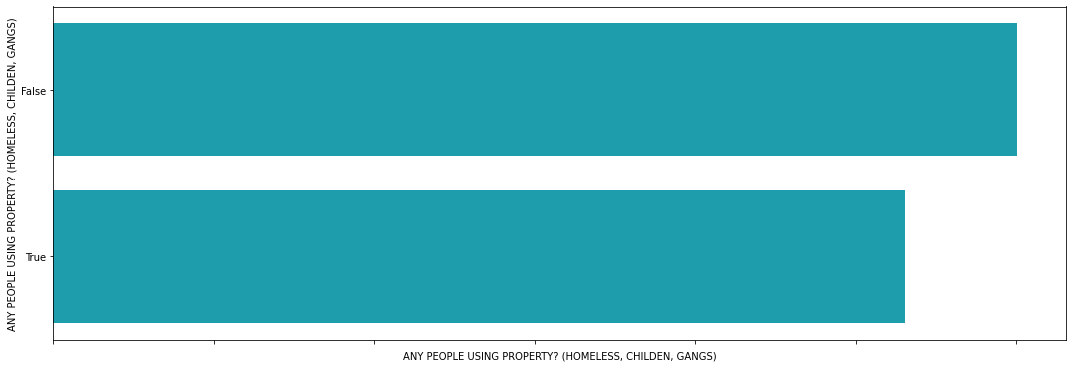

In [23]:
df_bins = df[['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)']]


plt.figure(figsize=(15,10))

col = ['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)']

a = 1
for i in range(len(col)):
    plt.subplot(2, 1, a); 
    countplt = sns.countplot(y=df_bins[col[i]], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

## Review of Column: 'IS THE BUILDING VACANT DUE TO FIRE?'

In [24]:
df.groupby('IS THE BUILDING VACANT DUE TO FIRE?').count()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ADDRESS STREET NUMBER,...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
IS THE BUILDING VACANT DUE TO FIRE?,,,,,,,,,,,,,,,,,,,,,
False,51447,51447,51447,51359,0,51443,30973,51445,51408,51446,...,51219,51208,51430,51430,51430,51430,51430,51424,51424,51424
True,4552,4552,4552,4546,0,4552,2824,4551,4548,4552,...,4530,4514,4550,4550,4550,4550,4550,4547,4547,4547


<ipython-input-25-ad795c277a27>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)


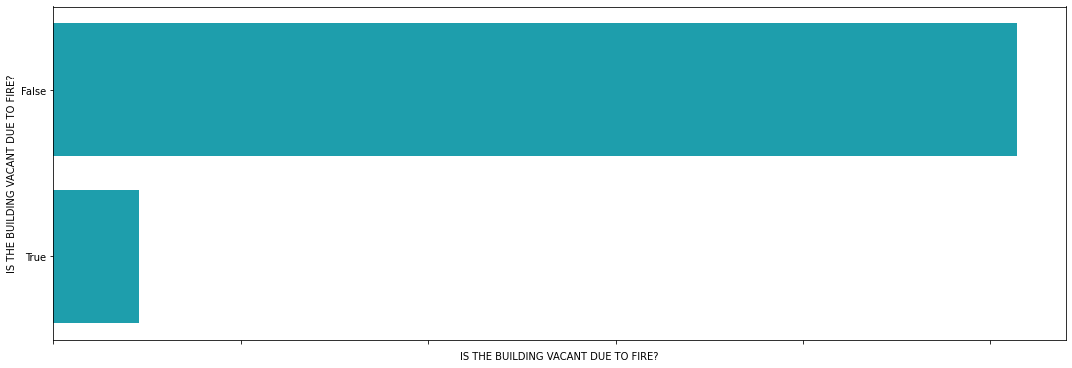

In [25]:
df_bins = df[['IS THE BUILDING VACANT DUE TO FIRE?']]


plt.figure(figsize=(15,10))

col = ['IS THE BUILDING VACANT DUE TO FIRE?']

a = 1
for i in range(len(col)):
    plt.subplot(2, 1, a); 
    countplt = sns.countplot(y=df_bins[col[i]], color = '#06b1c4')
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()

## Review of Column: 'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?'

In [26]:
df.groupby('IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?').count()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ADDRESS STREET NUMBER,...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",,,,,,,,,,,,,,,,,,,,,
3012 TO 3014 S SPAULIDNG,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ALL AROUND,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ALL DOORS AND WINDOWS,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BACK DOOR,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
BY SCHOOL,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YARDS FILLED WITH WEEDS .. GARAGE IS DILAPITATED,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
YARDS FILLED WITH WEEDS AND RODENTS,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
YES,16,16,16,16,0,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


<AxesSubplot:>

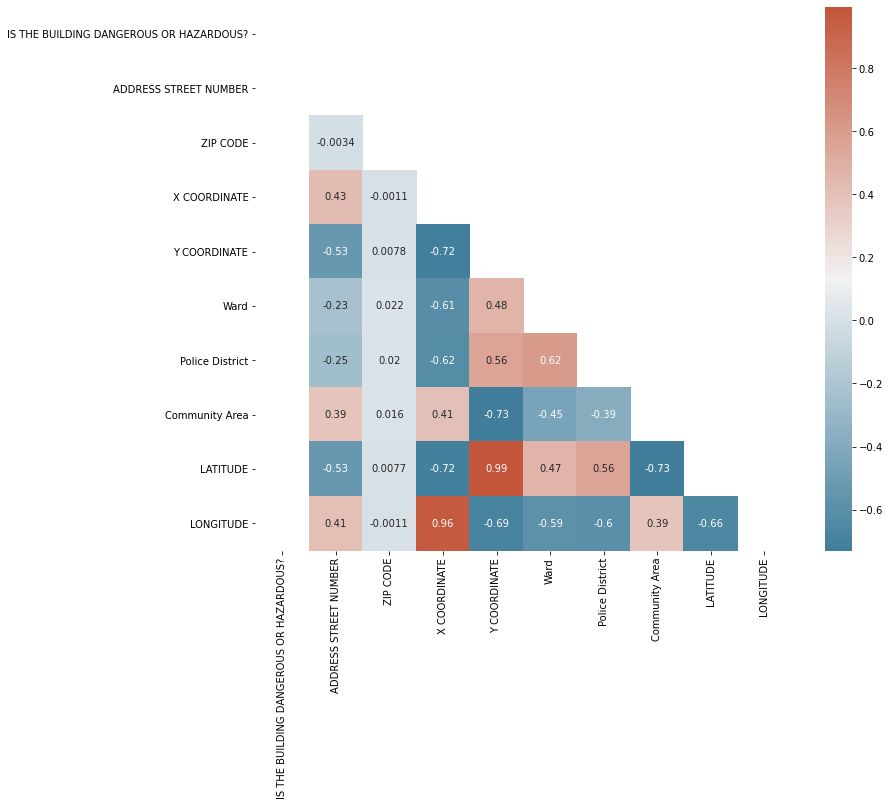

In [7]:
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Review of Time

In [19]:
# Conversion of date fields to datetime 
df['DATE SERVICE REQUEST WAS RECEIVED'] = pd.to_datetime(df['DATE SERVICE REQUEST WAS RECEIVED'])

In [28]:
df['Yearly Received'] = df['DATE SERVICE REQUEST WAS RECEIVED'].map(lambda dt: dt.strftime('%Y'))
df['Yearly Received'] = df['Yearly Received'].astype(float)

In [57]:
print(df['Yearly Received'].value_counts())

2011.0    15395
2012.0    11984
2013.0     8370
2010.0     6198
2014.0     5451
2015.0     5314
2016.0     4435
2018.0     3848
2017.0     3654
2009.0      436
2008.0       34
Name: Yearly Received, dtype: int64


array([[<AxesSubplot:title={'center':'Yearly Received'}>]], dtype=object)

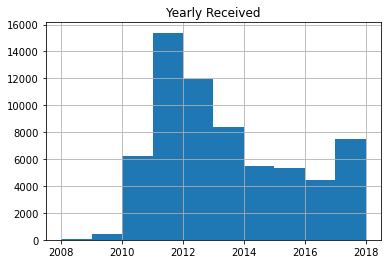

In [51]:
df_box = df[['Yearly Received']]
df_box.hist()

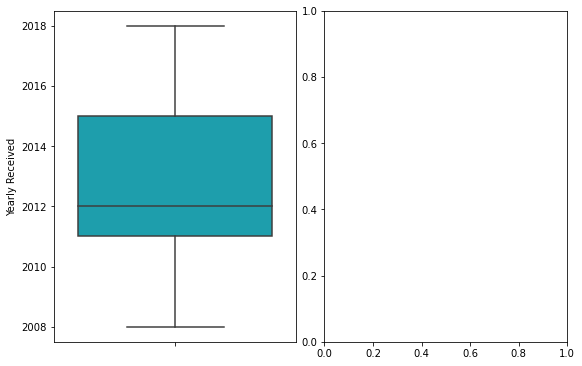

In [54]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 5))
index = 0
axs = axs.flatten()
for k,v in df_box.items():
    sns.boxplot(y=k, data=df_box, ax=axs[index],color = '#06b1c4')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)